In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

Text(0.5, 1.0, 'Sandal')

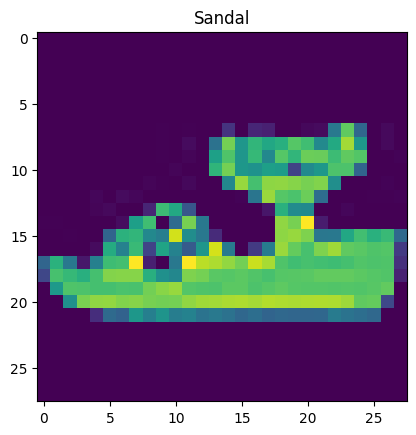

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
rand_index=np.random.randint(0,60000)
label=train_labels[rand_index]
plt.imshow(train_images[rand_index])
plt.title(class_names[label])

### Without Padding

In [4]:
model=Sequential(
[
Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)),
Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
Flatten(),
Dense(140,activation="relu"),
Dense(10,activation="softmax") ]
)

d:\Deep Learning\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 140)            │     2,168,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,686 (8.35 MB)

 Trainable params: 2,188,686 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

So when no padding is done ie padding="valid" we can see the feature map reducing the size of orignal image,<br>
As the image is send for more hidden layers due to no padding with convoution operation its size is decreasing.
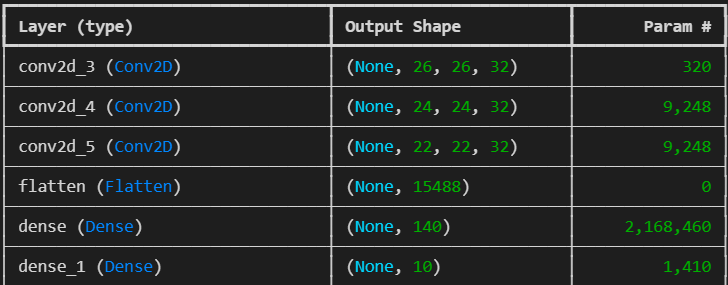

### With padding

In [6]:
model=Sequential(
[
Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28,28,1)),
Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'),
Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'),
Flatten(),
Dense(140,activation="relu"),
Dense(10,activation="softmax") ]
)

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 140)            │     3,512,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,532,686 (13.48 MB)

 Trainable params: 3,532,686 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

So No change in Image size size due to convolution operation

Padding with Strides

In [8]:
model=Sequential(
    [
Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)),
Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'),
Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'),
Flatten(),
Dense(140,activation="relu"),
Dense(10,activation="softmax")

        
    ]
)

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 140)            │        71,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,046 (359.55 KB)

 Trainable params: 92,046 (359.55 KB)

 Non-trainable params: 0 (0.00 B)

### Pooling


In [12]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    
    Conv2D(32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    
    Flatten(),
    Dense(140, activation="relu"),
    Dense(10, activation="softmax")
])

Image size get reduced here also due to pooling

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 140)            │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,598 (60.93 KB)

 Trainable params: 15,598 (60.93 KB)

 Non-trainable params: 0 (0.00 B)